랜덤하게 생성한 100개의 점이 특정한 4개 점((1.0, 1.0), (-1.0, 1.0), (-1.0, -1.0), (1.0, -1.0)) 중 어느 점에 제일 가까운지 (Euclidean distance 기준) 확인하는 코드를 작성해봅시다.  
과제의 지시사항과 지시사항별 배점은 아래와 같습니다.

#### 1. 100개의 점들이 각각 특정한 4개의 점 중 Euclidean distance 기준으로 어느 점과 제일 가까운지 구하는 코드를 **TODO 파트의 지시대로** 정확하게 구현하기 (+5점)
#### 2. 구현 중 TODO 파트의 제한사항과 관련하여, broadcasting을 사용해야하는 이유와 이를 위해 expand_dims를 사용한 방식에 대해, 연산에 사용된 tensor의 shape과 관련지어 적절하게 서술하기 (+5점) (단, 3줄 내외로 작성할 것)


1과 관련한 코드 작성은 TODO 파트에만 해주시고, 다른 부분은 그대로 둬주세요.   
1번 항목에 적혀있듯, 해당 파트에 보다 자세한 지시사항들이 포함되어 있습니다.  
<a href='#TODO'>TODO 파트로 이동하기</a>  

2와 관련한 서술은 파일 제일 아래에 생성해둔 markdown 셀을 이용해주세요.  
<a href='#explanation'>서술내용 작성할 마크다운 셀로 이동하기</a>  
과제 제출시에는 1, 2에 대한 내용 작성 후 해당 파일 파일명에 [이름]란을 채워 제출합니다.  

**표절이 발견되는 경우, 코드 제공자와 표절자 구분 없이 0점 처리합니다.**

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

print(tf.__version__)

2.2.0


### Plotting functions
문제 이해와 코드의 적절성 확인을 visualization을 통해 도와주는 그래프 플롯 함수입니다.

In [2]:
def plot_graph(p, s_p=None, c_p=None, str_title=None):
    fig = plt.figure(figsize=(6, 6))

    if str_title is not None:
        plt.title(str_title, fontsize=20, pad=20)

    if c_p is not None:
        for (i, col) in [(0, 'c'), (1, 'm'), (2, 'y'), (3, 'k')]:
            plt.plot(s_p[i,0], s_p[i,1], ls='none', marker='*', markeredgecolor=col, markerfacecolor=col, markersize=12)
            idx = tf.squeeze(tf.where(c_p==i))
            plt.plot(tf.gather(p, idx)[:,0], tf.gather(p, idx)[:,1], ls='none', marker='o', markeredgecolor=col, markerfacecolor=col)
    else:
        plt.plot(p[:,0], p[:,1], ls='none', marker='o')
        if s_p is not None:
            plt.plot(s_p[0,0], s_p[0,1], ls='none', marker='*', markeredgecolor='c', markerfacecolor='c', markersize=12)
            plt.plot(s_p[1,0], s_p[1,1], ls='none', marker='*', markeredgecolor='m', markerfacecolor='m', markersize=12)
            plt.plot(s_p[2,0], s_p[2,1], ls='none', marker='*', markeredgecolor='y', markerfacecolor='y', markersize=12)
            plt.plot(s_p[3,0], s_p[3,1], ls='none', marker='*', markeredgecolor='k', markerfacecolor='k', markersize=12)

    plt.tick_params(axis='both', labelsize=14)

## Preliminary

### Euclidean distance
Euclidean distance에 대한 wiki 링크: https://en.wikipedia.org/wiki/Euclidean_distance

두 점 $(p_1, p_2)$와 $(q_1, q_2)$ 사이의 euclidean distance는 아래와 같이 계산합니다.

$$\text {Euclidean distance between }(p_1, p_2) \text { and } (q_1, q_2) = \sqrt {(p_1-q_1)^2 + (p_2-q_2)^2} $$

### tf.argmin()
tf.argmin() 함수에 대한 tensorflow 공식 홈페이지 설명 링크: https://www.tensorflow.org/api_docs/python/tf/math/argmin

아래 예시 코드와 tensorflow 공식 홈페이지에서의 설명을 참고하여 tf.argmin() 함수를 이해하고 필요시 사용하세요.

In [3]:
ex = tf.constant([[3.0, 1.5, 0.0, 2.5], [5.0, 1.0, 2.0, 0.5]])
print(ex)

argmin1 = tf.argmin(ex, 0) #hint: [3.0, 1.5, 0.0, 2.5]에서 가장 작은 수는 0.0이고, 인덱스는 2
argmin2 = tf.argmin(ex, 1) #hint: [3.0, 5.0]에서 가장 작은 수는 3.0이고, 인덱스는 0
print(argmin1)
print(argmin2)

tf.Tensor(
[[3.  1.5 0.  2.5]
 [5.  1.  2.  0.5]], shape=(2, 4), dtype=float32)
tf.Tensor([0 1 0 1], shape=(4,), dtype=int64)
tf.Tensor([2 3], shape=(2,), dtype=int64)


## Ready

무작위의 점 100개와 특정 점 4개를 생성합니다.

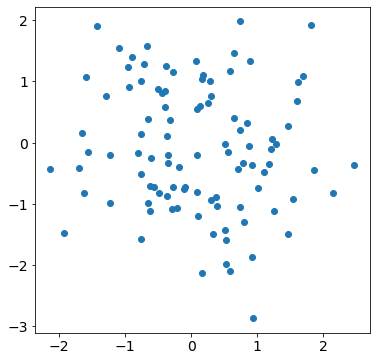

In [4]:
#무작위의 점 100개 생성
p = tf.random.normal([100, 2], 0, 1)
plot_graph(p)

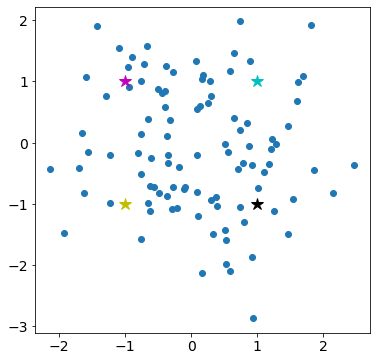

In [5]:
#특정한 4개의 점 생성 (그래프에서 다른 점들과 다른 색의 별표로 표시됨)
#위에서 생성한 100개 점이 이 네 개 점 중 어느 점과 가장 가까운지 찾는 것이 목표
s_p = tf.constant([[1.0, 1.0], [-1.0, 1.0], [-1.0, -1.0], [1.0, -1.0]])
# visulization
plot_graph(p,s_p)

<a id='TODO'></a>
## TODO Part

**Input으로 활용할 텐서**    
p: shape이 [100, 2]인 tensor로, p[i, 0]은 i번째 랜덤 포인트의 x좌표값을, p[i, 1]은 i번째 랜덤 포인트의 y좌표값을 담고 있습니다.  
s_p: shape이 [4, 2]인 tensor로, s_p[j, 0]은 특정 포인트 j의 x좌표값을, s_p[j, 1]은 특정 포인트 j의 y좌표값을 담고 있습니다. 위에서 생성한 100개의 데이터가 이 특정 포인트 0, 1, 2, 3 중 어느 점과 가장 가까운지 찾아야합니다.  

**최종 Output**    
p_c: shape이 [100, ]인 tensor로, p_c[k]는 k번째 랜덤 포인트(p[k,:])와 가장 가까운 특정 포인트의 번호(0, 1, 2, 3 중 하나의 값, 데이터 타입: int64)를 담고 있습니다.

**제한 사항**
1. 코드 구현시 broadcasting을 사용할 것
2. 코드 구현시 broadcasting을 위해 expand_dims를 사용할 것

In [6]:
#--------(TODO start)--------#


#--------(TODO end)--------#

## Verification

In [7]:
print(p_c.shape)
print(p_c.dtype)

(100,)
<dtype: 'int64'>


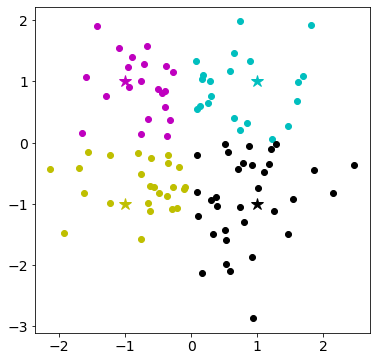

In [8]:
# 정답으로 생성되어야 할 이미지 모습입니다.
plot_graph(p,s_p,p_c)

<a id='explanation'></a>
## 문제와 관련한 서술

구현 중 broadcasting을 사용해야하는 이유와 이를 위해 expand_dims를 사용한 방식에 대하여, 연산에 사용된 tensor의 shape과 관련지어 아래 마크다운 셀에 세줄 내외로 적절히 서술하세요.